## Study the distribution of LDA/NMF topics

In [195]:
import pickle
from utils import * 
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

Load the pre-trained models

In [2]:
def load_topic_model(vectorizer_file_name, topic_model_file_name):
    with open(vectorizer_file_name, "rb") as f:
        vectorizer = pickle.load(f)
    with open(topic_model_file_name, "rb") as f:
        topic_model = pickle.load(f)
    return vectorizer, topic_model

In [3]:
vec, tm = load_topic_model('model/pizza_tfidf_vectorizer.pkl','model/pizza_nmf.pkl')

In [4]:
vec2, tm2 = load_topic_model('model/pizza_count_vectorizer.pkl','model/pizza_lda.pkl')

In [5]:
vec3, tm3 = load_topic_model('model/chinese_tfidf_vectorizer.pkl','model/chinese_nmf.pkl')

In [6]:
vec4, tm4 = load_topic_model('model/chinese_count_vectorizer.pkl','model/chinese_lda.pkl')

In [7]:
def display_topics(model, feature_names, n_top_words):
    for topic_index, topic in enumerate(model.components_):
        print("Topic %d:" % topic_index)
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words:-1]]))

In [8]:
tm.components_

array([[  5.35318219e-02,   0.00000000e+00,   4.09802948e-02, ...,
          7.96897006e-02,   3.98538679e-02,   0.00000000e+00],
       [  7.86209423e-02,   1.88202333e-01,   3.27705625e-02, ...,
          2.97546372e-02,   9.73259392e-02,   0.00000000e+00],
       [  3.54345514e-01,   2.62719244e+00,   1.12437870e-01, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  4.13455229e-02,   0.00000000e+00,   4.27813136e-04, ...,
          0.00000000e+00,   6.59642074e-02,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          3.22001617e-02,   1.51870707e-01,   0.00000000e+00],
       [  1.37329447e-02,   0.00000000e+00,   7.26685010e-02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [9]:
tm2.components_

array([[  2.00000000e-02,   2.00000000e-02,   2.00000000e-02, ...,
          2.00000000e-02,   2.00000000e-02,   2.00000000e-02],
       [  2.00000000e-02,   2.00000000e-02,   2.00000000e-02, ...,
          2.00000000e-02,   2.00000000e-02,   2.00000000e-02],
       [  2.00000000e-02,   2.00000001e-02,   2.00000000e-02, ...,
          2.00000000e-02,   2.00000000e-02,   2.00000000e-02],
       ..., 
       [  2.00000000e-02,   1.30035557e+04,   2.00000000e-02, ...,
          2.00000000e-02,   2.00000000e-02,   2.00000000e-02],
       [  2.00000000e-02,   2.00000000e-02,   2.00000000e-02, ...,
          2.00000000e-02,   2.00000000e-02,   2.00000000e-02],
       [  2.00000000e-02,   2.24278850e+02,   2.00000000e-02, ...,
          2.00000000e-02,   2.00000000e-02,   2.00000000e-02]])

In [10]:
# DATAPASS2 = '../../../yelp10/dataset/review.json'
# review = load_json_to_df(DATAPASS2)

In [11]:
# DATAPASS = '../../../yelp10/dataset/business.json'
# business = load_json_to_df(DATAPASS)

In [12]:
def business_id_retrieval(cat, business):
    '''
    
    Input:
        cat(str) : category
        business(dataframe) : the business data
    Output:
        id_list(set) : business ids of a particular category
    '''
    id_list = set()
    idx = 0
    for row in business.values:
        categories = row[3]
        if cat in categories:
            id_list.add(row[2])
    return id_list

In [13]:
# pizza = business_id_retrieval('Pizza', business)
# review_pizza = review.loc[review['business_id'].isin(pizza)]
# review_pizza.to_csv('pizza_reviews.csv', index = False)

In [15]:
review_pizza = pd.read_csv('pizza_reviews.csv')

In [105]:
# chinese = business_id_retrieval('Chinese', business)
# review_chinese = review.loc[review['business_id'].isin(chinese)]
# review_chinese.to_csv('chinese_reviews.csv', index = False)

In [17]:
review_chinese = pd.read_csv('chinese_reviews.csv')

In [18]:
import random
sample_id = random.sample(range(review_pizza.shape[0]),5)

In [19]:
def highlight_topic_words(sentence, vec):
    tokenizer = vec.build_tokenizer()
    analyzer = vec.build_analyzer()
    topic_words = vec.get_feature_names()
    out = []
    for word in tokenizer(sentence):
        if word.lower() in topic_words:
            out.append('\x1b[6;30;43m' + word + '\x1b[0m')
        else:
            out.append(word)
    print (' '.join(out))

In [26]:
for t in review_pizza.iloc[sample_id]['text']:
    highlight_topic_words(t, vec)
    print ('\n')

The only thing good about this place is the workers are friendly that being said everything was overpriced and the workers seemed inexperienced The pizza was little teeny tiny for bucks what am at the airport Then the salad was like bucks and could ve made it better and have It was supposed to be like tomato cucumber and red onion salad Well it was pretty much just tomatoes with like couple cucumbers slices and no onion will say the ingredients were very fresh so that was good They give very small dressing for big salad which had to ask for because they forgot and no silverware They also didn ask basic things like here or to go dressing on it or on side Also it took long time for what was made Probably wont be back here sorry


Love love love this place could eat here every day Creative delicious farm to table food Never had bad meal


Tamal said he was going to make me the best pizza in Toronto He wasn joking will drive across town for one of his pizzas


Thought had to wait until my 

In [21]:
sample_id = random.sample(range(review_chinese.shape[0]),5)

In [27]:
for t in review_chinese.iloc[sample_id]['text']:
    highlight_topic_words(t, vec3)
    print ('\n')

They must of heard the complaints and changed things around Tried them again recently and the food was back to being top notch Way to go keep it up


Ohhhh Hollywood How love hate you Your amazing happy meal combo for 99 is so delicious Everyone should order it It comes with meats spaghetti or rice veggies soup and bun FOR 99 Unfortunately it ends at 7pm and that where am frustrated at the lack of options there are Hollywood definitely has some hit or misses While love the spaghetti they serve dislike their breakfast and found it cheap and bleh That why don bother coming after anymore The timings for different items on the menu is also kind of annoying Why can order this 24 My boyfriend is also annoyed at the lack of options for him as well and usually orders only the wings which are quite delicious That being said the cheap price of these items are one of the big factors of coming here lot of the dishes are under 10 also enjoy the presotea that is offered at lower price if your combo 

## Can we assume 1 topic per sentence?

Following *Sentence Level Recurrent Topic Model* 

Each sentence is a sum of topic index for each word (Product always resulted 0 because of the lack of overlaps)

In [156]:
def get_k_index(sentence, vec, tm):
    analyzer = vec.build_analyzer()
    topic_words = vec.get_feature_names()
    tm_mat = tm.components_
    k_index = np.array([0.]*tm_mat.shape[0])
    for word in analyzer(sentence):
        if word in topic_words:
            k_index += tm_mat[:, topic_words.index(word)]
    prob = k_index/(sum(k_index))
    return k_index, prob

In [157]:
sampleA = review_chinese.iloc[sample_id]['text'].values[2]

In [158]:
k, p = get_k_index(sampleA, vec3, tm3)

In [159]:
p[k.argsort()[:-4:-1]]

array([ 0.37061882,  0.26990587,  0.08833988])

In [160]:
def display_ith_topics(model, feature_names, n_top_words, ith):
    for i in ith:
        print("Topic %d:" % i)
        print(" ".join([feature_names[j] for j in model.components_[i].argsort()[:-n_top_words:-1]]))

In [161]:
display_ith_topics(tm3, vec3.get_feature_names(), 10, k.argsort()[:-4:-1])

Topic 6:
good pretty overall prices little bit value pricey thing
Topic 4:
noodles hand broth dan pulled bowl noodle ramen singapore
Topic 24:
tea milk bubble ice boba drink green hk drinks


In [162]:
sampleA

'Good noodles but even better dessert- go to Milk Bar.'

In [163]:
print('SampleA is')
for i, j in zip(p[k.argsort()[:-4:-1]], k.argsort()[:-4:-1]):
    print ('{}%, Topic{}'.format(int(i*100), j))

SampleA is
37%, Topic6
26%, Topic4
8%, Topic24


Try to see the distribution of highest proportion of topic per sentence

In [228]:
def get_highest_prob(sentence, vec, tm):
    analyzer = vec.build_analyzer()
    topic_words = vec.get_feature_names()
    tm_mat = tm.components_
    k_index = np.array([0.]*tm_mat.shape[0])
    for word in analyzer(sentence):
        if word in topic_words:
            k_index += tm_mat[:, topic_words.index(word)]
    return max(k_index/(sum(k_index))) if sum(k_index) != 0 else 0

In [229]:
get_highest_prob(sampleA, vec3,tm3)

0.37061881849570738

In [203]:
# random 5000 sample 
ids = random.sample(range(review_chinese.shape[0]),5000)

In [206]:
probs = []
for review in review_chinese.iloc[ids]['text'].values:
    sent_text = nltk.sent_tokenize(review)
    for s in sent_text:
        p = get_highest_prob(s, vec3, tm3)
        if p != 0:
            probs.append(p)

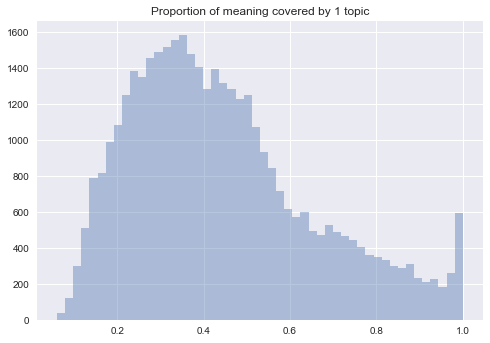

In [230]:
sns.distplot(probs, kde = False)
plt.title('Proportion of meaning covered by 1 topic')
plt.show()

In [224]:
def get_topic_threshold(sentence, vec, tm, thresh):
    analyzer = vec.build_analyzer()
    topic_words = vec.get_feature_names()
    tm_mat = tm.components_
    k_index = np.array([0.]*tm_mat.shape[0])
    for word in analyzer(sentence):
        if word in topic_words:
            k_index += tm_mat[:, topic_words.index(word)]
    
    counter = 0
    prob = 0.0
    if sum(k_index) == 0:
        return counter
    else:
        mat = sorted(k_index/(sum(k_index)), reverse = True)
        while (prob < thresh):
            prob += mat[counter]
            counter += 1
        return counter

In [225]:
get_topic_threshold(sampleA, vec3, tm3, 0.8)

5

In [226]:
topics = []
for review in review_chinese.iloc[ids]['text'].values:
    sent_text = nltk.sent_tokenize(review)
    for s in sent_text:
        p = get_topic_threshold(s, vec3, tm3, 0.8)
        if p != 0:
            topics.append(p)

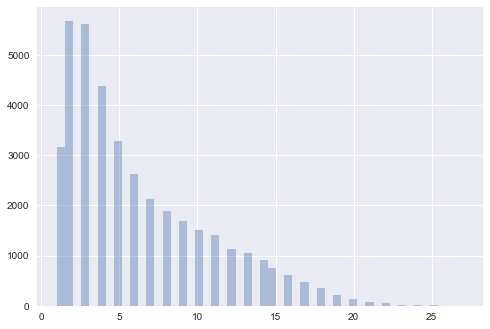

In [227]:
sns.distplot(topics, kde = False)
plt.show()